We pretty much always want to start notebooks with this line:

In [1]:
%pylab inline
import os
import sys
sys.path.insert(0, os.path.abspath('/Users/helenarichie/Documents/Grad School/Semester 2/Classes/Astronomical Techniques/Notebooks/python'))

Populating the interactive namespace from numpy and matplotlib


# Below is a code box you can do calculations in

(for the group discussion problems during lecture)

In [2]:
# reasoning through this means that we can think of the average of the two individual probabilities 0.5*(0.4 + 0.1) = 0.25
p_ae = 0.4
p_al = 0.1
p_e = p_l = 0.5
p_a = p_ae * p_e + p_al * p_l
print(f"Probability of randomly selecting a galaxy with an AGN: {p_a}")

Probability of randomly selecting a galaxy with an AGN: 0.25


## Investigating probability distributions

Let's simulate rolling 100 dice and counting the total number of ones from each trial.  __Fix the code below, consulting with your group as to what should replace the ????'s.__  A blank code box is below in case you want to bring up help on `random.rand`, `np.sum` (look for the `axis` keyword...), etc.

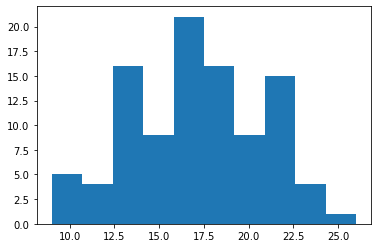

In [14]:
import numpy.random as random
import numpy as np
nsims=int(1E5)
prob=1/6.
is_one=(random.rand(100, 100) < prob)
ndice=100
# plot a histogram of the total # of 1's from each sim
plt.hist(np.sum(is_one[:,0:ndice], axis=1))
plt.show()

In [15]:
??random.rand

### Implementing this as a function

We want to perform this calculation for different numbers of dice and look at the distribution of results.  This is done in the file `dice.py`, which you should download from Canvas into your python program path (i.e. where you put modules).  New things we're using in this code:

        plt.figure(i) 
This will create a new, separate figure for each plot.  

        plt.title(str(ndice) + ' dice')
`str(ndice)` converts `ndice` to a string.  `plt.title` gives a title to the plot.

__Import the new module (with `import dice`) and run the `rolldice` function from the module in the below code box.__  Try 50_000 simulations to start with.

In [16]:
import dice

## Checking the binomial distribution

__Add the following code (or your own equivalent code) to the rolldice procedure.__  You should be able to copy and paste to do this (be sure to save the file afterward).  Note that this code belongs _inside_ the for loop, as we want to test things for each possible number of dice.

Checking if $\mu = N \times p$ with `np.mean()` or `np.sum()`

    print(f'ndice: {ndice}')
    print(f'np.mean: {np.mean(np.sum(is_one[:,0:ndice],axis=1))}')
    print(f'np.sum: {np.sum(np.sum(is_one[:,0:ndice],axis=1))/nsims:.4f}')
    print(f'Expected mean: {ndice*prob:.4f} ')

Checking if the variance $\sigma^2 = N \times p \times (1-p)$ with `np.std` or `np.var`:

    print(f'np.std**2:{np.std( np.sum(is_one[:, 0:ndice],axis=1) )**2:.4f}')
    print(f'np.var: {np.var( np.sum(is_one[:, 0:ndice],axis=1) ) :.4f}')
    print(f'Expected variance: {ndice*prob*(1-prob):.4f}')
    
Also print a blank line to make results clearer:

    print('')

    
In the above,

    print(f'ndice: {ndice}')
is using the f-string formatting in Python. We can specify whether to format as integers or floating point numbers, how many decimal points to add, etc. by putting a colon inside the brackets; e.g. `{ndice:.4f}` would specify that ndice will be printed as a floating point number with 4 digits after the decimal point.  See https://cis.bentley.edu/sandbox/wp-content/uploads/Documentation-on-f-strings.pdf for documentation of the different possible formatting. 

__After making your changes, reload the module and run `rolldice` in the code box below.__

Note that to import the reload function you will need to do:

    from imp import reload
    reload(dice)

In [17]:
from imp import reload
reload(dice)

<module 'dice' from '/Users/helenarichie/Documents/Grad School/Semester 2/Classes/Astronomical Techniques/Notebooks/python/dice.py'>

## Plotting the binomial distribution

To calculate the binomial distribution, we need to use combinatorics.  Scipy provides functions to calculate either factorials (`scipy.misc.factorial()`) or the number of combinations (N choose M), `scipy.misc.comb()` . 

At the top of the module, let's add imports for them:

	from scipy.special import factorial,comb
Then, after: 

     plt.hist( np.sum(is_one[:,0:ndice],axis=1), range=(-0.5,ndice+0.5),bins=(ndice + 1) )
Add:

    x=np.arange(ndice + 1)
and either:    

    plt.plot(x,nsims*factorial(ndice)/factorial(x)/   \
    factorial(ndice-x)*prob**x*(1-prob)**(ndice-x),'r-')
where the \ indicates that the python command continues onto the next line, or:

    plt.plot(x,nsims*comb(ndice,x)*prob**x*(1-prob)**(ndice-x),'ro')
    
__Then reload the module and plot again using the code box below.  Does what you get match expectations?__    


ndice: 2
np.mean: 0.3282
np.sum: 0.3282
Expected mean: 0.3333 

np.std**2:0.2745
np.var: 0.2745
Expected variance: 0.2778

ndice: 2
ndice: 5
np.mean: 0.835
np.sum: 0.8350
Expected mean: 0.8333 

np.std**2:0.7218
np.var: 0.7218
Expected variance: 0.6944

ndice: 5
ndice: 10
np.mean: 1.6932
np.sum: 1.6932
Expected mean: 1.6667 

np.std**2:1.4387
np.var: 1.4387
Expected variance: 1.3889

ndice: 10
ndice: 25
np.mean: 4.1618
np.sum: 4.1618
Expected mean: 4.1667 

np.std**2:3.5024
np.var: 3.5024
Expected variance: 3.4722

ndice: 25
ndice: 100
np.mean: 16.6218
np.sum: 16.6218
Expected mean: 16.6667 

np.std**2:14.0412
np.var: 14.0412
Expected variance: 13.8889

ndice: 100


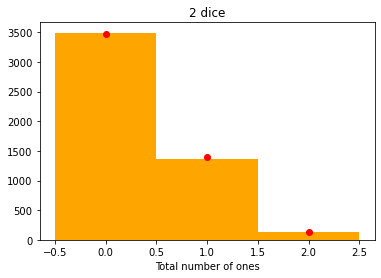

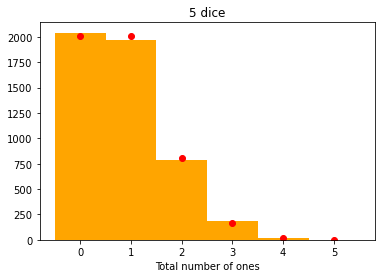

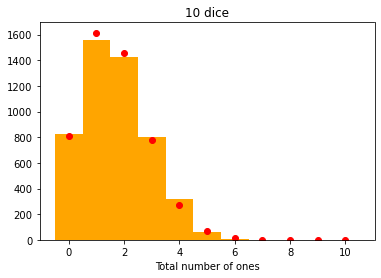

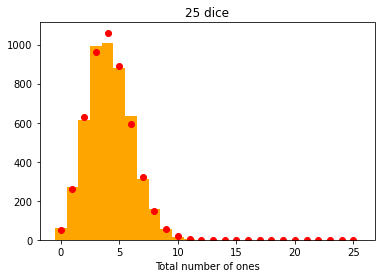

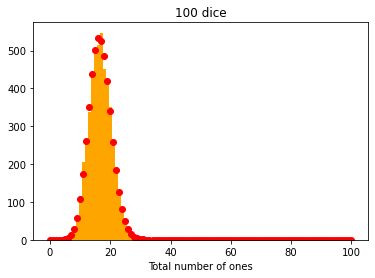

In [18]:
reload(dice)
dice.rolldice(5000)

## Using the scipy-provided binomial function

`scipy.stats.binom.pmf(x,n,prob)` provides the probability of getting x occurrences out of n trials if the probability of an occurrence is `prob` (note that x can be an array!).  `pmf` here stands for "probability mass function".

Alternatively, you can set up an *object* that is a member of the binomial class and inherits all of its functions ("methods"), utilizing fixed values for `n` and `prob`, with e.g.

				a = stats.binom(n,prob)
and then get the PMF (the discrete equivalent of a PDF) via

 				a.pmf(x)

__In the below code box, import scipy.stats and read the documentation for binom__.

__Then, modify rolldice to add a curve to your plots showing the expected number of ones out of the simulation for each value of x, using `stats.binom` to calculate.__ Note that this will be `nsims` times the probability for one realization of the process (which is what the PMF gives you)...


In [19]:
import scipy.stats as stats
??stats.binom.pmf

# If you have extra time...

Some things you can do if you get ahead of the class:

- Try changing string formats to improve the outputs; try to change the font size in your figures to make them look better; etc.  Share plotting optimizations you tend to use with your neighbors!

- modify `rolldice` so that it can take the number of sides a die has as a keyword input (e.g. 4, 6, 8, 10, 12, 20 and even 100-sided dice exist).  Use 6 sides as a default (see https://www.ibiblio.org/g2swap/byteofpython/read/keyword-arguments.html for how to do this).  As the number of sides increases, the probability of rolling a one goes down.  
 - Does the distribution look more or less Gaussian as the probability changes?
 - Compare the distribution of results for rolling 10 20-sided dice to the distribution for rolling 50 100-sided dice.
        